Setting up file paths for accessing the csvs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path="data/"
sub={'production_meter/':['net_energy(kwh)/','average_power(kw)/'], 'weather_station/':['temperature(f)/','irradiance(w_per_m2)/']}
med='15_minutes/'
fin=['12_23_2019-12_31_2019', '01_01_2020-01_31_2020','02_01_2020-02_29_2020','03_01_2020-03_31_2020','04_01_2020-04_30_2020','05_01_2020-05_31_2020','06_01_2020-06_30_2020','07_01_2020-07_31_2020','08_01_2020-08_31_2020','09_01_2020-09_30_2020','10_01_2020-10_31_2020','11_01_2020-11_30_2020','12_01_2020-12_26_2020']
end='.csv'

Importing csvs

In [2]:
csvs={}
for i in sub:
    for j in sub[i]:
        csvs[j]=pd.DataFrame()
        for k in fin:
            t=pd.read_csv(path+i+j+med+k+end)
            csvs[j]=pd.concat([csvs[j], t])
energy, power, temp, irradiance=csvs['net_energy(kwh)/'], csvs['average_power(kw)/'], csvs['temperature(f)/'], csvs['irradiance(w_per_m2)/']

In [3]:
print(energy.shape)
print(temp.shape)
print(irradiance.shape)
print(power.shape)

(35520, 2)
(35520, 4)
(35520, 3)
(35520, 2)


Number of missing entries

In [4]:
print(energy.isnull().sum())
print(irradiance.isnull().sum())
print(temp.isnull().sum())
print(power.isnull().sum())

Site Time                                        0
Production meter net energy Kilowatt hours    2717
dtype: int64
Site Time              0
POA Watts/meter²    2717
GHI Watts/meter²    2717
dtype: int64
Site Time                                                    0
Weather station module temperature                        2717
Weather station ambient temperature Degrees Fahrenheit    2717
Weather station device temperature                        2717
dtype: int64
Site Time                                     0
Production meter active power Kilowatts    2713
dtype: int64


Eliminating all rows with missing data

In [5]:
energy=energy.dropna()
temp=temp.dropna()
irradiance=irradiance.dropna()
power=power.dropna()

Converting 'Site Time' column to datetime data type

In [6]:
energy['Site Time']=pd.to_datetime(energy['Site Time'])
temp['Site Time']=pd.to_datetime(temp['Site Time'])
irradiance['Site Time']=pd.to_datetime(irradiance['Site Time'])
power['Site Time']=pd.to_datetime(power['Site Time'])

<ipython-input-6-76656fae4867>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy['Site Time']=pd.to_datetime(energy['Site Time'])
<ipython-input-6-76656fae4867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Site Time']=pd.to_datetime(temp['Site Time'])
<ipython-input-6-76656fae4867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [7]:
print(power.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32807 entries, 32 to 2495
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Site Time                                32807 non-null  datetime64[ns]
 1   Production meter active power Kilowatts  32807 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 768.9+ KB
None


Conversion of columns to numeric types

In [8]:
power['Production meter active power Kilowatts']=pd.to_numeric(power['Production meter active power Kilowatts'].astype(str).str.replace(',',''))

<ipython-input-8-4d53cc21011e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['Production meter active power Kilowatts']=pd.to_numeric(power['Production meter active power Kilowatts'].astype(str).str.replace(',',''))


In [9]:
irradiance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32803 entries, 32 to 2495
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Site Time         32803 non-null  datetime64[ns]
 1   POA Watts/meter²  32803 non-null  object        
 2   GHI Watts/meter²  32803 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.0+ MB


Conversion of columns to numeric types

In [10]:
irradiance['POA Watts/meter²'], irradiance['GHI Watts/meter²']=pd.to_numeric(irradiance['POA Watts/meter²'].astype(str).str.replace(',','')), pd.to_numeric(irradiance['GHI Watts/meter²'].astype(str).str.replace(',',''))

<ipython-input-10-0787c698118b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irradiance['POA Watts/meter²'], irradiance['GHI Watts/meter²']=pd.to_numeric(irradiance['POA Watts/meter²'].astype(str).str.replace(',','')), pd.to_numeric(irradiance['GHI Watts/meter²'].astype(str).str.replace(',',''))


Collating the four dataframes into one

In [11]:
site_data=energy.merge(power, on='Site Time').merge(temp, on='Site Time').merge(irradiance, on='Site Time')

In [12]:
site_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32807 entries, 0 to 32806
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Site Time                                               32807 non-null  datetime64[ns]
 1   Production meter net energy Kilowatt hours              32807 non-null  float64       
 2   Production meter active power Kilowatts                 32807 non-null  float64       
 3   Weather station module temperature                      32807 non-null  float64       
 4   Weather station ambient temperature Degrees Fahrenheit  32807 non-null  float64       
 5   Weather station device temperature                      32807 non-null  float64       
 6   POA Watts/meter²                                        32807 non-null  float64       
 7   GHI Watts/meter²                                        328

In [13]:
site_data[27400:27450]

Site Time  Production meter net energy Kilowatt hours  \
27400 2020-10-31 16:15:00                                        31.0   
27401 2020-10-31 16:30:00                                        16.0   
27402 2020-10-31 16:45:00                                         9.0   
27403 2020-10-31 17:00:00                                         5.0   
27404 2020-10-31 17:15:00                                         4.0   
27405 2020-10-31 17:30:00                                         2.0   
27406 2020-10-31 17:45:00                                         0.0   
27407 2020-10-31 18:00:00                                         0.0   
27408 2020-10-31 18:15:00                                         0.0   
27409 2020-10-31 18:30:00                                         0.0   
27410 2020-10-31 18:45:00                                         0.0   
27411 2020-10-31 19:00:00                                         0.0   
27412 2020-10-31 19:15:00                                         0.0   
27413 2020-10-31 19:30:00                                         0.0   
27414 2020-10-31 19:45:00                                         0.0   
27415 2020-10-31 20:00:00                                        -1.0   
27416 2020-10-31 20:15:00                                         0.0   
27417 2020-10-31 20:30:00                                         1.0   
27418 2020-10-31 20:45:00                                        -1.0   
27419 2020-10-31 21:00:00                                         0.0   
27420 2020-10-31 21:15:00                                         0.0   
27421 2020-10-31 21:30:00                                         0.0   
27422 2020-10-31 21:45:00                                         0.0   
27423 2020-10-31 22:00:00                                         0.0   
27424 2020-10-31 22:15:00                                         0.0   
27425 2020-10-31 22:30:00                                         0.0   
27426 2020-10-31 22:45:00                                         0.0   
27427 2020-10-31 23:00:00                                         0.0   
27428 2020-10-31 23:15:00                                         0.0   
27429 2020-10-31 23:30:00                                         0.0   
27430 2020-10-31 23:45:00                                         0.0   
27431 2020-11-01 00:00:00                                         0.0   
27432 2020-11-01 00:15:00                                         0.0   
27433 2020-11-01 00:30:00                                         0.0   
27434 2020-11-01 00:45:00                                         0.0   
27435 2020-11-01 01:00:00                                         0.0   
27436 2020-11-01 01:00:00                                         0.0   
27437 2020-11-01 01:15:00                                         0.0   
27438 2020-11-01 01:15:00                                         0.0   
27439 2020-11-01 01:30:00                                         0.0   
27440 2020-11-01 01:30:00                                         0.0   
27441 2020-11-01 01:45:00                                         0.0   
27442 2020-11-01 01:45:00                                         0.0   
27443 2020-11-01 02:00:00                                         0.0   
27444 2020-11-01 02:15:00                                         0.0   
27445 2020-11-01 02:30:00                                        -1.0   
27446 2020-11-01 02:45:00                                         0.0   
27447 2020-11-01 03:00:00                                         0.0   
27448 2020-11-01 03:15:00                                         1.0   
27449 2020-11-01 03:30:00                                        -1.0   

       Production meter active power Kilowatts  \
27400                                  129.883   
27401                                   71.975   
27402                                   36.033   
27403                                   23.184   
27404                                   15

Rough elimination of irrelevant nighttime values

In [14]:
site_data=site_data[(site_data['Site Time'].dt.hour>=5) & (site_data['Site Time'].dt.hour<=20)]

In [15]:
site_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21887 entries, 0 to 32794
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Site Time                                               21887 non-null  datetime64[ns]
 1   Production meter net energy Kilowatt hours              21887 non-null  float64       
 2   Production meter active power Kilowatts                 21887 non-null  float64       
 3   Weather station module temperature                      21887 non-null  float64       
 4   Weather station ambient temperature Degrees Fahrenheit  21887 non-null  float64       
 5   Weather station device temperature                      21887 non-null  float64       
 6   POA Watts/meter²                                        21887 non-null  float64       
 7   GHI Watts/meter²                                        218

Replacement of datettime column with a column containing the hour of each corresponding datettime

In [16]:
site_data['Site Time']=site_data['Site Time'].dt.hour

Creating input feature dataset, X, and target dataset, y, and train test splitting

In [17]:
X=site_data.drop(columns=['Production meter net energy Kilowatt hours', 'Production meter active power Kilowatts'])
y=site_data['Production meter active power Kilowatts'].copy()
X_train, X_test, y_train, y_test=X[:int(.8*len(X))], X[int(.8*len(X)):], y[:int(.8*len(y))], y[int(.8*len(y)):]

Utility function for normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

def scaling(X_train, X_test, y_train, y_test):
    scalers=[]
    for i in X_train.columns:
        scaler=MinMaxScaler(feature_range=(-1,1))
        X_train[i]=scaler.fit_transform(X_train[i].to_frame())
        scalers.append(scaler)
        X_test[i]=scaler.transform(X_test[i].to_frame())
    
    scaler=MinMaxScaler(feature_range=(-1,1))
    y_train=scaler.fit_transform(y_train.to_frame())
    scalers.append(scaler)
    y_test=scaler.transform(y_test.to_frame())
    return X_train, X_test, y_train, y_test, scalers, scaler

X_train, X_test, y_train, y_test, xscalers, yscaler=scaling(X_train, X_test, y_train, y_test)

<ipython-input-18-a4c1af16c118>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i]=scaler.fit_transform(X_train[i].to_frame())
<ipython-input-18-a4c1af16c118>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i]=scaler.transform(X_test[i].to_frame())
<ipython-input-18-a4c1af16c118>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Fitting of basic SVR to data

In [19]:
from sklearn.svm import SVR

reg=SVR().fit(X_train, y_train)

/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction of basic SVR on test data

In [20]:
predict=pd.DataFrame(reg.predict(X_test))
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(yscaler.inverse_transform(predict), yscaler.inverse_transform(y_test))))

68.63014281221825


Comparison of prediction to ground truth

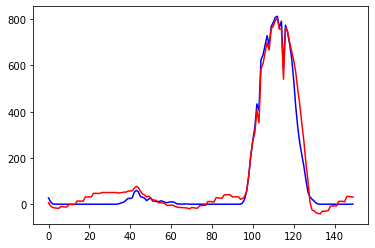

In [21]:
plt.plot(yscaler.inverse_transform(y_test[-150:]), color='blue')
plt.plot(yscaler.inverse_transform(predict[-150:]), color='red')

Fitting SVR with GridSearch

In [22]:
from sklearn.model_selection import GridSearchCV

new_reg=GridSearchCV(estimator=SVR(), param_grid = [
  #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ])
new_reg.fit(X_train, y_train)

/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/markL/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

Comparison of prediction to ground truth

72.56375176747413


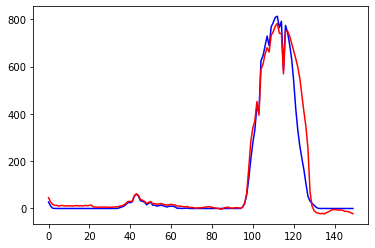

In [23]:
predict=new_reg.predict(X_test)
import math
print(math.sqrt(mean_squared_error(yscaler.inverse_transform(pd.DataFrame(predict)), yscaler.inverse_transform(pd.DataFrame(y_test)))))
plt.plot(yscaler.inverse_transform(y_test[-150:]), color='blue')
plt.plot(yscaler.inverse_transform(pd.DataFrame(predict)[-150:]), color='red')